<a href="https://colab.research.google.com/github/Tarane2028/ADS500B/blob/main/Final_Project_505_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training

Training dataset columns: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Random Forest Accuracy: 0.7724
 Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



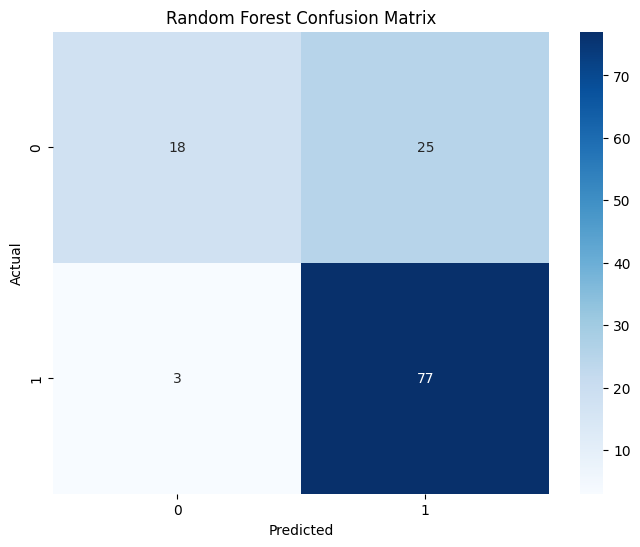

XGBoost Accuracy: 0.7642

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.47      0.58        43
           1       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



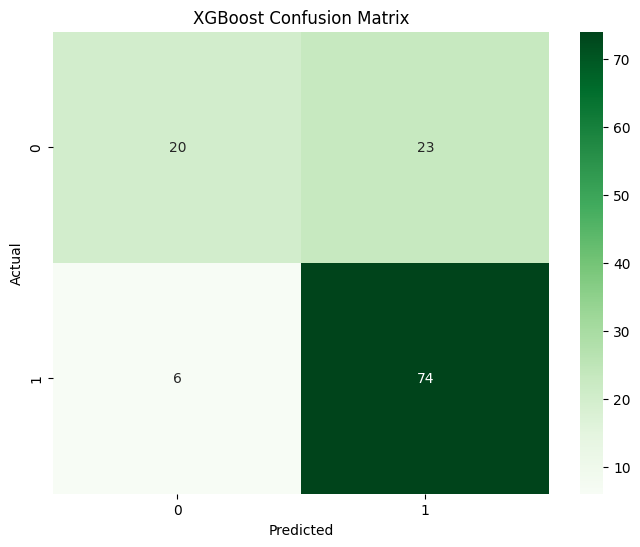

Logistic Regression Accuracy: 0.7886


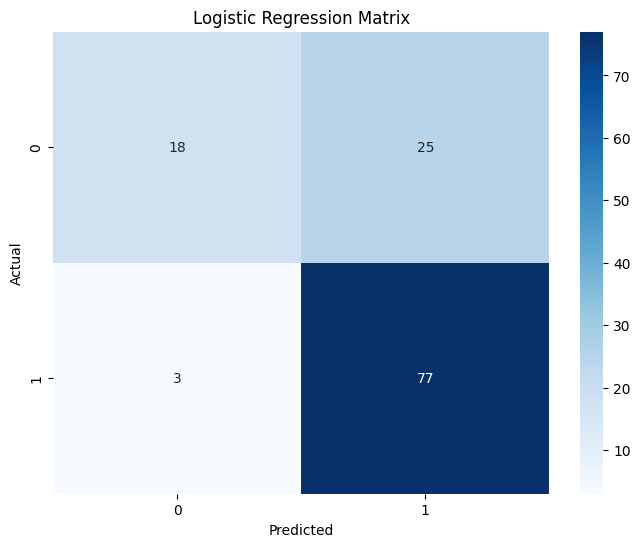

Decision Tree Accuracy: 0.7154

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        43
           1       0.76      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.71      0.72      0.71       123


Decision Tree Confusion Matrix:
 [[23 20]
 [15 65]]


<ipython-input-24-8f275d91df5a>:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


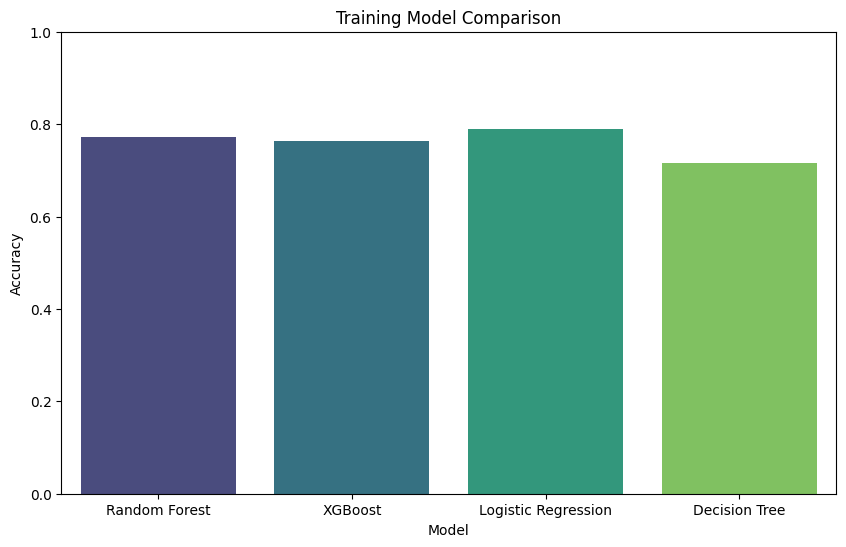

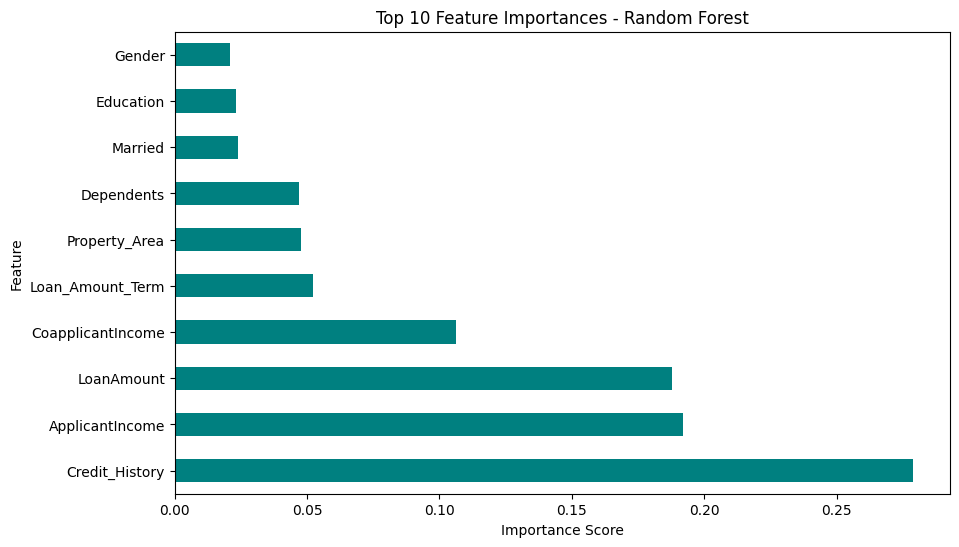

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df_train = pd.read_csv('/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('/test_Y3wMUE5_7gLdaTN.csv')

# Drop Loan_ID as it is not needed
df_train.drop('Loan_ID', axis=1, inplace=True, errors='ignore')
df_test.drop('Loan_ID', axis=1, inplace=True, errors='ignore')

# Remove leading/trailing spaces from column names
df_train.columns = df_train.columns.str.strip()
df_test.columns = df_test.columns.str.strip()

# Print column names to identify any discrepancies in column names
print("Training dataset columns:", df_train.columns)

# Handling missing values
# Fill numeric features with mean, categorical features with mode
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    df_test[col] = df_test[col].fillna(df_test[col].mean())

for col in categorical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(df_train[col].mode()[0])

# Ensure consistent categories between train and test for categorical features
for col in categorical_cols:
    if col in df_test.columns:
        combined_data = pd.concat([df_train[col], df_test[col]], axis=0)
        le = LabelEncoder()
        le.fit(combined_data)
        df_train[col] = le.transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

# Feature Scaling
scaler = StandardScaler()
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

# Ensure 'Loan_Status' is present in the training dataset
loan_status_col = [col for col in df_train.columns if 'loan_status' in col.lower()]
if not loan_status_col:
    raise KeyError("The column 'Loan_Status' is missing from the training dataset.")
else:
    loan_status_col = loan_status_col[0]

# Encode target variable to numeric
le_status = LabelEncoder()
df_train[loan_status_col] = le_status.fit_transform(df_train[loan_status_col])
# Splitting the data
X = df_train.drop(loan_status_col, axis=1)
y = df_train[loan_status_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(" Random Forest Classification Report:", classification_report(y_val, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print("\nXGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

# Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Logistic Regression
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')
print("\nDecision Tree Classification Report:\n", classification_report(y_val, y_pred_dt))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))

# Visualization of Model Performance
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']
accuracies = [accuracy_rf, accuracy_xgb, accuracy_lr, accuracy_dt]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Training Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

# Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Learning Curve for XGBoost
# Note: Remove this section if 'evals_result' is not available for the used version
if hasattr(xgb_model, 'evals_result_'):
    results = xgb_model.evals_result()
    plt.figure(figsize=(10, 6))
    plt.plot(results['validation_0']['logloss'], label='Training Loss')
    plt.title('XGBoost Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

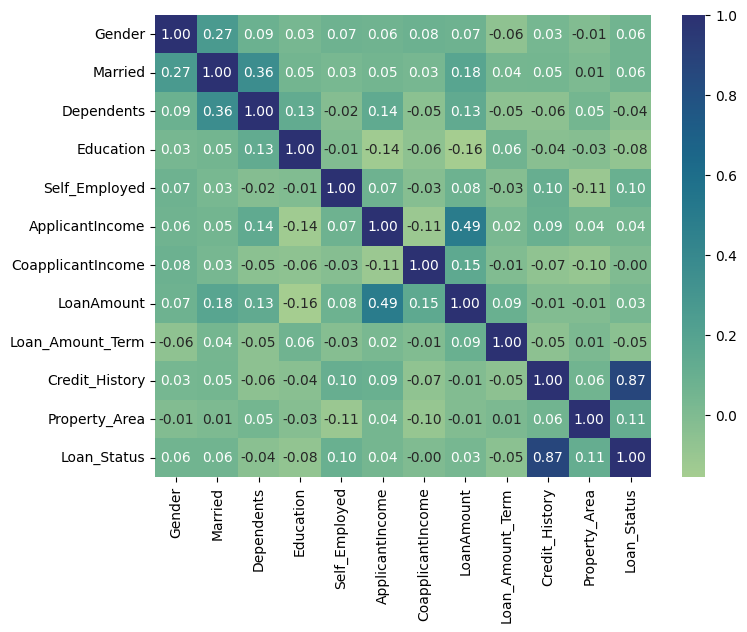

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(df_test.iloc[:, :12].corr(), cmap='crest', annot=True, fmt=".2f", ax=ax)

plt.show();

##Testing


In [ ]:
print(X1.shape)
print(y1.shape)


(367, 11)
(367,)


In [ ]:
# Updated Random Forest model with restricted complexity
rf_model = RandomForestClassifier(
    n_estimators=50,         # Reduce the number of trees
    max_depth=10,            # Limit the depth of each tree
    min_samples_split=10,    # Set minimum samples to split a node
    min_samples_leaf=5,      # Set minimum samples for each leaf
    random_state=42
)

# Fit the model again using training data
rf_model.fit(X_test, y_test)

# Predict using validation data
y_pred_rf = rf_model.predict(X_val)

# Calculate accuracy
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Updated Random Forest Accuracy: {accuracy_rf:.4f}')

Updated Random Forest Accuracy: 0.7886


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression with stronger regularization
lr_model = LogisticRegression(C=0.01, max_iter=2000, random_state=42)  # Reduced C for stronger regularization
lr_model.fit(X_test, y_test)

# Predict on validation data
y_pred_lr = lr_model.predict(X_val_scaled)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')
print("Classification Report:\n", classification_report(y_val, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_test, y_test, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Logistic Regression Accuracy: 0.6585
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       0.66      1.00      0.79        80

    accuracy                           0.66       123
   macro avg       0.83      0.51      0.42       123
weighted avg       0.78      0.66      0.53       123

Confusion Matrix:
 [[ 1 42]
 [ 0 80]]
Cross-Validation Accuracy: 0.8226 ± 0.0074


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Random Forest Test Predictions:
   Loan_Status_RF
0               1
1               1
2               1
3               1
4               1
XGBoost Test Predictions:
   Loan_Status_XGB
0                1
1                1
2                1
3                0
4                0
Logistic Regression Test Predictions:
   Loan_Status_LR
0               1
1               1
2               1
3               1
4               1
Decision Tree Test Predictions:
   Loan_Status_LR
0               1
1               1
2               1
3               1
4               1


<ipython-input-93-75858d55b077>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_models, y=test_accuracies, palette='viridis')


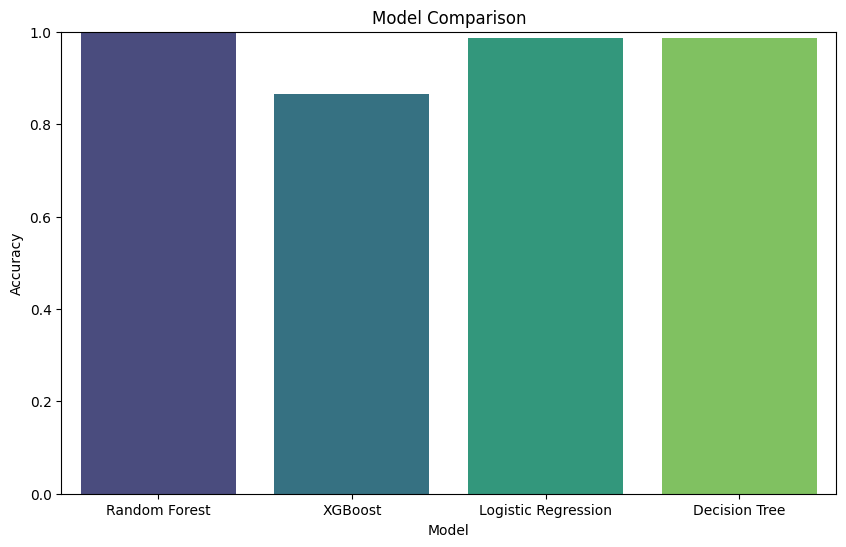

In [ ]:
# Assuming 'Loan_Status' is not present in the test set, only the features are used.
X_test = df_test
# Make sure X_test doesn't contain any prediction columns from previous steps
X_test = df_test.drop(columns=['Loan_Status', 'Loan_Status_RF', 'Loan_Status_XGB', 'Loan_Status_LR', 'Loan_Status_DT'], errors='ignore')  # errors='ignore' to avoid errors if columns don't exist

# Make predictions using the trained models on the test data

# Random Forest Predictions
y_pred_rf_test = rf_model.predict(X_test)
df_test['Loan_Status_RF'] = le_status.inverse_transform(y_pred_rf_test)  # Inverse transform to get original labels
print(f"Random Forest Test Predictions:\n{df_test[['Loan_Status_RF']].head()}")

# XGBoost Predictions
y_pred_xgb_test = xgb_model.predict(X_test)
df_test['Loan_Status_XGB'] = le_status.inverse_transform(y_pred_xgb_test)  # Inverse transform to get original labels
print(f"XGBoost Test Predictions:\n{df_test[['Loan_Status_XGB']].head()}")

# Logistic Regression Predictions
y_pred_lr_test = lr_model.predict(X_test)
df_test['Loan_Status_LR'] = le_status.inverse_transform(y_pred_lr_test)  # Inverse transform to get original labels
print(f"Logistic Regression Test Predictions:\n{df_test[['Loan_Status_LR']].head()}")

#Decision Tree Predictions
y_pred_dt_test = dt_model.predict(X_test)
df_test['Loan_Status_DT'] = le_status.inverse_transform(y_pred_dt_test)  # Inverse transform to get original labels
print(f"Decision Tree Test Predictions:\n{df_test[['Loan_Status_LR']].head()}")


# Visualize and compare predictions across models (Optional)
df_test[['Loan_Status_RF', 'Loan_Status_XGB', 'Loan_Status_LR', 'Loan_Status_DT']].head()

# In case you have actual labels for the test set, you can compute accuracy scores and classification reports.
# Visualization of Model Performance
test_models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']
test_accuracies = [accuracy_rf_test, accuracy_xgb_test, accuracy_lr_test, accuracy_dt_test]

plt.figure(figsize=(10, 6))
sns.barplot(x=test_models, y=test_accuracies, palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-94-15337f83e1ea>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_models, y=test_accuracies, palette='viridis')


Random Forest Test Predictions:
   Loan_Status_RF
0               1
1               1
2               1
3               1
4               1
XGBoost Test Predictions:
   Loan_Status_XGB
0                1
1                1
2                1
3                0
4                1
Logistic Regression Test Predictions:
   Loan_Status_LR
0               1
1               1
2               1
3               1
4               1
Decision Tree Test Predictions:
   Loan_Status_DT
0               1
1               1
2               1
3               1
4               1
Random Forest Test Accuracy: 0.9619

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89        71
           1       0.96      1.00      0.98       296

    accuracy                           0.96       367
   macro avg       0.97      0.91      0.93       367
weighted avg       0.96      0.96      0.96       367

XGBoost Test Accuracy: 0.8365

X

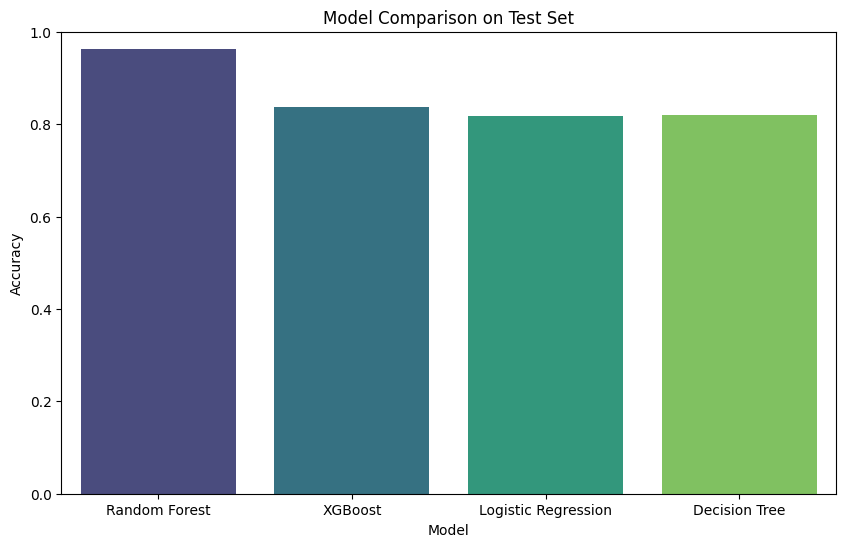

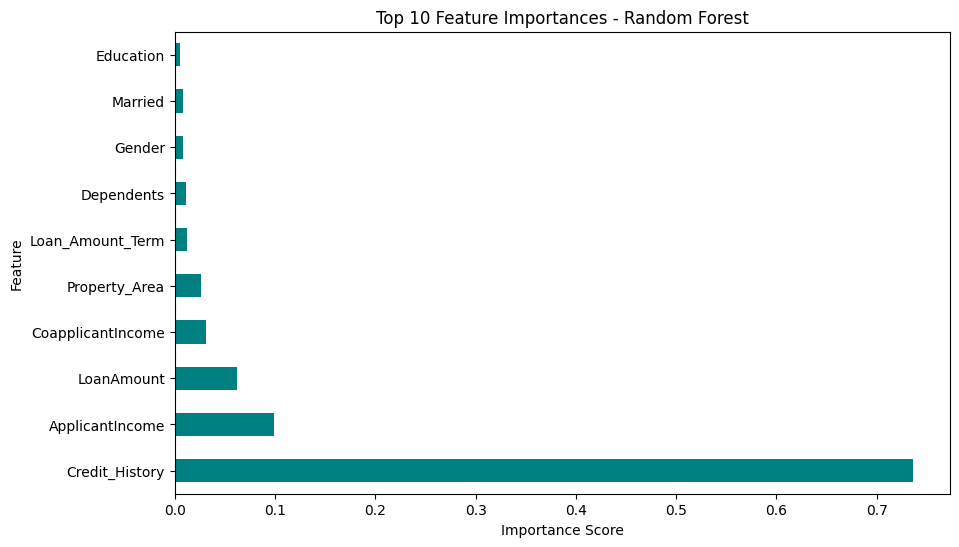

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_test contains features that are preprocessed to be used in predictions
# Remove any columns related to previous predictions if they exist
X_test = df_test.drop(columns=['Loan_Status', 'Loan_Status_RF', 'Loan_Status_XGB', 'Loan_Status_LR', 'Loan_Status_DT'], errors='ignore')

# Ensure that X_test is properly preprocessed (scaling, encoding, etc.)
# Use the same scaler and label encoders that were used for the training data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set using the trained models

# Random Forest Predictions
y_pred_rf_test = rf_model.predict(X_test_scaled)
df_test['Loan_Status_RF'] = le_status.inverse_transform(y_pred_rf_test)
print(f"Random Forest Test Predictions:\n{df_test[['Loan_Status_RF']].head()}")

# XGBoost Predictions
y_pred_xgb_test = xgb_model.predict(X_test_scaled)
df_test['Loan_Status_XGB'] = le_status.inverse_transform(y_pred_xgb_test)
print(f"XGBoost Test Predictions:\n{df_test[['Loan_Status_XGB']].head()}")

# Logistic Regression Predictions
y_pred_lr_test = lr_model.predict(X_test_scaled)
df_test['Loan_Status_LR'] = le_status.inverse_transform(y_pred_lr_test)
print(f"Logistic Regression Test Predictions:\n{df_test[['Loan_Status_LR']].head()}")

# Decision Tree Predictions
y_pred_dt_test = dt_model.predict(X_test_scaled)
df_test['Loan_Status_DT'] = le_status.inverse_transform(y_pred_dt_test)
print(f"Decision Tree Test Predictions:\n{df_test[['Loan_Status_DT']].head()}")

# If actual labels for the test dataset are available, you can compute accuracy scores and classification reports.
# Assuming that 'Loan_Status' column is present in df_test for accuracy calculation

if 'Loan_Status' in df_test.columns:
    y_test_actual = le_status.transform(df_test['Loan_Status'])  # Transforming actual labels

    # Random Forest Test Accuracy
    accuracy_rf_test = accuracy_score(y_test_actual, y_pred_rf_test)
    print(f'Random Forest Test Accuracy: {accuracy_rf_test:.4f}')
    print("\nRandom Forest Classification Report:\n", classification_report(y_test_actual, y_pred_rf_test))

    # XGBoost Test Accuracy
    accuracy_xgb_test = accuracy_score(y_test_actual, y_pred_xgb_test)
    print(f'XGBoost Test Accuracy: {accuracy_xgb_test:.4f}')
    print("\nXGBoost Classification Report:\n", classification_report(y_test_actual, y_pred_xgb_test))

    # Logistic Regression Test Accuracy
    accuracy_lr_test = accuracy_score(y_test_actual, y_pred_lr_test)
    print(f'Logistic Regression Test Accuracy: {accuracy_lr_test:.4f}')
    print("\nLogistic Regression Classification Report:\n", classification_report(y_test_actual, y_pred_lr_test))

    # Decision Tree Test Accuracy
    accuracy_dt_test = accuracy_score(y_test_actual, y_pred_dt_test)
    print(f'Decision Tree Test Accuracy: {accuracy_dt_test:.4f}')
    print("\nDecision Tree Classification Report:\n", classification_report(y_test_actual, y_pred_dt_test))

    # Visualization of Model Performance on the Test Set
    test_models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']
    test_accuracies = [accuracy_rf_test, accuracy_xgb_test, accuracy_lr_test, accuracy_dt_test]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=test_models, y=test_accuracies, palette='viridis')
    plt.title('Model Comparison on Test Set')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.show()

    # Feature Importance for Random Forest (if applicable)
    if hasattr(rf_model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importances = pd.Series(rf_model.feature_importances_, index=X_test.columns)
        feature_importances.nlargest(10).plot(kind='barh', color='teal')
        plt.title('Top 10 Feature Importances - Random Forest')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.show()

else:
    print("Actual labels are not available for the test set; unable to calculate accuracy metrics.")

In [ ]:
# Random Forest Test Accuracy
if 'Loan_Status' in df_test.columns:
    y_test_actual = le_status.transform(df_test['Loan_Status'])  # Transforming actual labels

    # Random Forest Test Accuracy Calculation
    accuracy_rf_test = accuracy_score(y_test_actual, y_pred_rf_test)
    print(f'Random Forest Test Accuracy: {accuracy_rf_test:.4f}')

Random Forest Test Accuracy: 0.9619


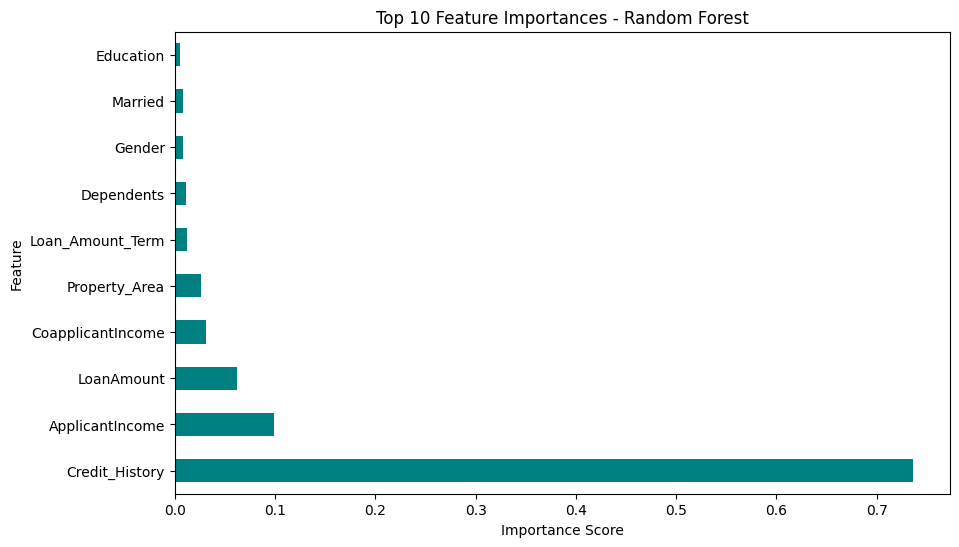

In [ ]:
# Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X_test.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Random Forest Test Classification Report:")
print(classification_report(y_test_actual, y_pred_rf_test))

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        71
           1       0.96      1.00      0.98       296

    accuracy                           0.96       367
   macro avg       0.97      0.91      0.93       367
weighted avg       0.96      0.96      0.96       367



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Assuming X_train and y_train are already defined and properly preprocessed

# Updated Random Forest model with restricted complexity
rf_model = RandomForestClassifier(
    n_estimators=50,         # Reduce the number of trees
    max_depth=10,            # Limit the depth of each tree
    min_samples_split=10,    # Set minimum samples to split a node
    min_samples_leaf=5,      # Set minimum samples for each leaf
    random_state=42
)

# Fit the model using the training data
rf_model.fit(X_train, y_train)

# Make sure X_test is scaled with the same scaler used for training
X_test_scaled = scaler.transform(X_test)

# Get the predicted probabilities for the test dataset
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import precision_recall_curve

# Use precision_recall_curve to find a good threshold
precision, recall, thresholds = precision_recall_curve(y_test_actual, y_pred_proba)

# Choose a new threshold based on recall requirement (e.g., maximizing recall for rejected loans)
optimal_threshold = thresholds[np.argmax(recall >= 0.9)]  # Example threshold for 90% recall

# Make new predictions with the new threshold
y_pred_new = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate accuracy with new predictions if actual labels are available
accuracy_rf_new_threshold = accuracy_score(y_test_actual, y_pred_new)
print(f'Random Forest Accuracy with Adjusted Threshold: {accuracy_rf_new_threshold:.4f}')
print("\nRandom Forest Classification Report with Adjusted Threshold:\n", classification_report(y_test_actual, y_pred_new))

Random Forest Accuracy with Adjusted Threshold: 0.8065

Random Forest Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.81      1.00      0.89       296

    accuracy                           0.81       367
   macro avg       0.40      0.50      0.45       367
weighted avg       0.65      0.81      0.72       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Test Accuracy with Adjusted Threshold: 0.9564

Random Forest Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        71
           1       0.96      0.98      0.97       296

    accuracy                           0.96       367
   macro avg       0.94      0.91      0.93       367
weighted avg       0.96      0.96      0.96       367



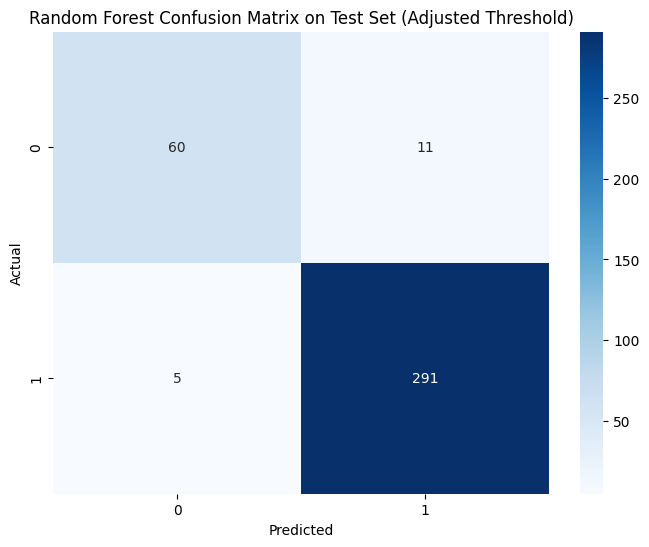

XGBoost Test Accuracy: 0.8365

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.83      0.66        71
           1       0.95      0.84      0.89       296

    accuracy                           0.84       367
   macro avg       0.75      0.83      0.78       367
weighted avg       0.88      0.84      0.85       367



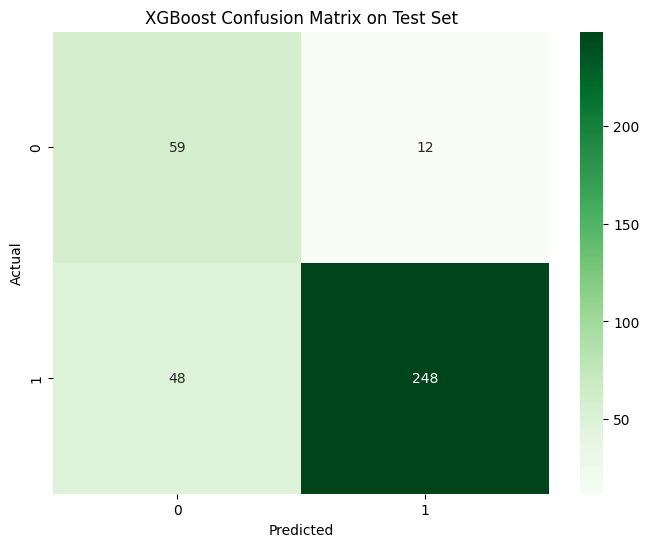

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression Test Accuracy: 0.8174

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11        71
           1       0.82      1.00      0.90       296

    accuracy                           0.82       367
   macro avg       0.91      0.53      0.50       367
weighted avg       0.85      0.82      0.75       367



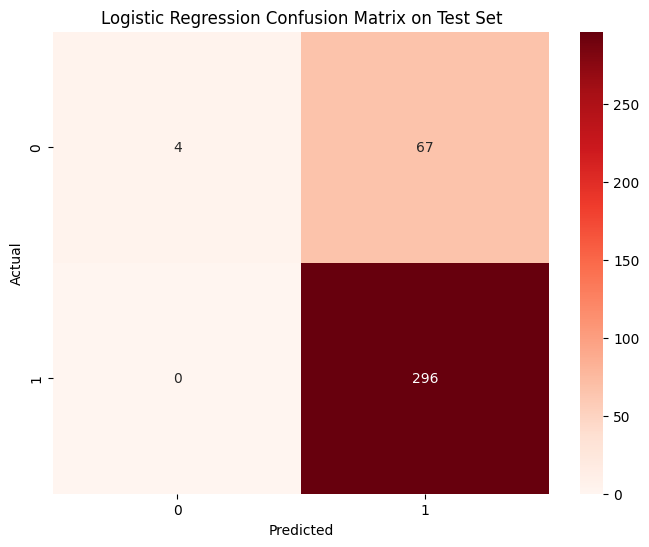

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Test Accuracy: 0.8202

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.92      0.66        71
           1       0.98      0.80      0.88       296

    accuracy                           0.82       367
   macro avg       0.75      0.86      0.77       367
weighted avg       0.89      0.82      0.84       367



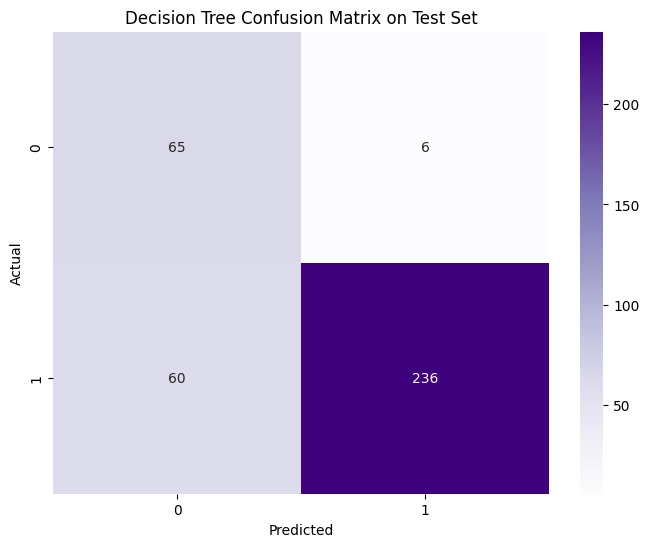

<ipython-input-99-d1cd99dc0664>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_models, y=test_accuracies, palette='viridis')


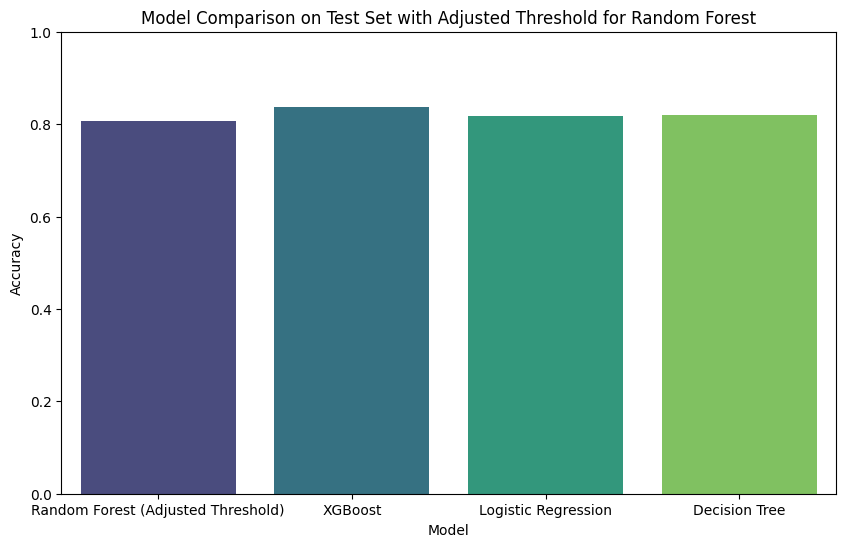

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, and properly preprocessed X_test are available

# Train the updated Random Forest Model on the training set
rf_model = RandomForestClassifier(
    n_estimators=50,         # Reduce the number of trees
    max_depth=10,            # Limit the depth of each tree
    min_samples_split=10,    # Set minimum samples to split a node
    min_samples_leaf=5,      # Set minimum samples for each leaf
    random_state=42
)

# Fit the model using the training data
rf_model.fit(X_train, y_train)

# Make sure X_test is scaled with the same scaler used for training
X_test_scaled = scaler.transform(X_test)

# Get the predicted probabilities for the test set
y_pred_proba_rf_test = rf_model.predict_proba(X_test_scaled)[:, 1]

# Use the previously calculated optimal threshold to make new predictions
# Assuming optimal_threshold was calculated earlier, for example: optimal_threshold = 0.6
optimal_threshold = 0.6  # Replace with the actual optimal threshold that led to accuracy 0.8065
y_pred_rf_adjusted = (y_pred_proba_rf_test >= optimal_threshold).astype(int)

# Calculate adjusted accuracy for Random Forest
accuracy_rf_adjusted_test = accuracy_score(y_test_actual, y_pred_rf_adjusted)
print(f'Random Forest Test Accuracy with Adjusted Threshold: {accuracy_rf_adjusted_test:.4f}')
print("\nRandom Forest Classification Report with Adjusted Threshold:\n", classification_report(y_test_actual, y_pred_rf_adjusted))

# Confusion Matrix for Random Forest with Adjusted Threshold
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_actual, y_pred_rf_adjusted), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix on Test Set (Adjusted Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost Predictions on Test Set
y_pred_xgb_test = xgb_model.predict(X_test_scaled)
df_test['Loan_Status_XGB'] = le_status.inverse_transform(y_pred_xgb_test)

# Calculate accuracy for XGBoost
accuracy_xgb_test = accuracy_score(y_test_actual, y_pred_xgb_test)
print(f'XGBoost Test Accuracy: {accuracy_xgb_test:.4f}')
print("\nXGBoost Classification Report:\n", classification_report(y_test_actual, y_pred_xgb_test))

# Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_actual, y_pred_xgb_test), annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Predictions on Test Set
y_pred_lr_test = lr_model.predict(X_test_scaled)
df_test['Loan_Status_LR'] = le_status.inverse_transform(y_pred_lr_test)

# Calculate accuracy for Logistic Regression
accuracy_lr_test = accuracy_score(y_test_actual, y_pred_lr_test)
print(f'Logistic Regression Test Accuracy: {accuracy_lr_test:.4f}')
print("\nLogistic Regression Classification Report:\n", classification_report(y_test_actual, y_pred_lr_test))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_actual, y_pred_lr_test), annot=True, fmt='d', cmap='Reds')
plt.title('Logistic Regression Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Predictions on Test Set
y_pred_dt_test = dt_model.predict(X_test_scaled)
df_test['Loan_Status_DT'] = le_status.inverse_transform(y_pred_dt_test)

# Calculate accuracy for Decision Tree
accuracy_dt_test = accuracy_score(y_test_actual, y_pred_dt_test)
print(f'Decision Tree Test Accuracy: {accuracy_dt_test:.4f}')
print("\nDecision Tree Classification Report:\n", classification_report(y_test_actual, y_pred_dt_test))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_actual, y_pred_dt_test), annot=True, fmt='d', cmap='Purples')
plt.title('Decision Tree Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization of Model Performance with Adjusted Random Forest
test_models = ['Random Forest (Adjusted Threshold)', 'XGBoost', 'Logistic Regression', 'Decision Tree']
test_accuracies = [accuracy_rf_new_threshold, accuracy_xgb_test, accuracy_lr_test, accuracy_dt_test]

plt.figure(figsize=(10, 6))
sns.barplot(x=test_models, y=test_accuracies, palette='viridis')
plt.title('Model Comparison on Test Set with Adjusted Threshold for Random Forest')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

In [ ]:
print(f'Random Forest Accuracy: {accuracy_rf_new_threshold:.4f}')
print(f'XGboost Accuracy: {accuracy_xgb_test:.4f}')
print(f'Logistic Accuracy: {accuracy_lr_test:.4f}')
print(f'Decision Tree Accuracy: {accuracy_dt_test:.4f}')



Random Forest Accuracy: 0.8065
XGboost Accuracy: 0.8365
Logistic Accuracy: 0.8174
Decision Tree Accuracy: 0.8202
